In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Load the dataframe and parse the dates

date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
df = pd.read_csv('sales_upd.csv',
                 index_col = 'InvoiceDate',
                 parse_dates=['InvoiceDate'],
                 date_parser = date_parser,
                 dtype={
                     'Invoice' : 'string'
                 })
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
InvoiceDate,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.4
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.0
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.0
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.8
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.0


In [3]:
df['Invoice'].value_counts()

537434    1350
538071    1304
537638    1202
537237    1194
536876    1186
          ... 
499989       1
545012       1
544999       1
499999       1
539664       1
Name: Invoice, Length: 41939, dtype: Int64

In [4]:
df['Customer ID'].value_counts()

17841.0    12890
14911.0    11247
12748.0     7230
14606.0     6566
14096.0     5111
           ...  
15657.0        1
17077.0        1
16219.0        1
12846.0        1
17331.0        1
Name: Customer ID, Length: 5881, dtype: int64

In [5]:
df['Country'].value_counts()

United Kingdom          961219
EIRE                     17354
Germany                  16703
France                   13941
Netherlands               5093
Spain                     3720
Switzerland               3137
Belgium                   3069
Portugal                  2562
Australia                 1815
Channel Islands           1569
Italy                     1468
Norway                    1437
Sweden                    1338
Cyprus                    1155
Finland                   1032
Austria                    922
Denmark                    798
Unspecified                752
Greece                     657
Poland                     512
Japan                      485
United Arab Emirates       467
USA                        409
Israel                     369
Hong Kong                  358
Singapore                  339
Malta                      282
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        168
Bahrain 

In [6]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     5783
REGENCY CAKESTAND 3 TIER               4065
JUMBO BAG RED RETROSPOT                3395
ASSORTED COLOUR BIRD ORNAMENT          2939
PARTY BUNTING                          2742
                                       ... 
ENGLISH ROSE TEA FOR ONE GIFT BOX         1
MARIE ANTOIENETT TRINKET BOX GOLD         1
did  a credit  and did not tick ret       1
CANDY STRIPE ROSE QUILT                   1
PAPER CRAFT , LITTLE BIRDIE               1
Name: Description, Length: 5469, dtype: int64

In [7]:
pd.options.display.float_format = '{:.2f}'.format

revenue_per_country = df.groupby(['Country'])['Revenue'].sum()
revenue_per_country.sort_values(ascending=False)

Country
United Kingdom         17871351.35
EIRE                     664431.78
Netherlands              554232.34
Germany                  431262.46
France                   356944.60
Australia                169968.11
Spain                    109178.53
Switzerland              101011.29
Sweden                    91903.72
Denmark                   69862.19
Belgium                   65753.42
Norway                    60109.62
Portugal                  58016.65
Japan                     47138.39
Channel Islands           44996.76
Italy                     32550.42
Finland                   29925.54
Singapore                 25317.06
Cyprus                    24980.13
Hong Kong                 23894.32
Austria                   23613.01
Greece                    19096.19
Israel                    11334.66
United Arab Emirates      11097.63
Unspecified               10936.01
Poland                    10902.45
USA                        8366.86
Malta                      8099.09
Lithuania   

In [8]:
df_month = df.resample('M').sum()
df_month.drop(['Price', 'Customer ID'], axis = 1, inplace=True)
df_month

,Quantity,Revenue
InvoiceDate,,
2009-12-31,445861,825685.76
2010-01-31,396087,652708.50
2010-02-28,392763,553713.31
2010-03-31,531689,833570.13
2010-04-30,387240,681528.99
2010-05-31,425348,659858.86
2010-06-30,415541,752270.14
2010-07-31,359615,650712.94
2010-08-31,522803,697274.91


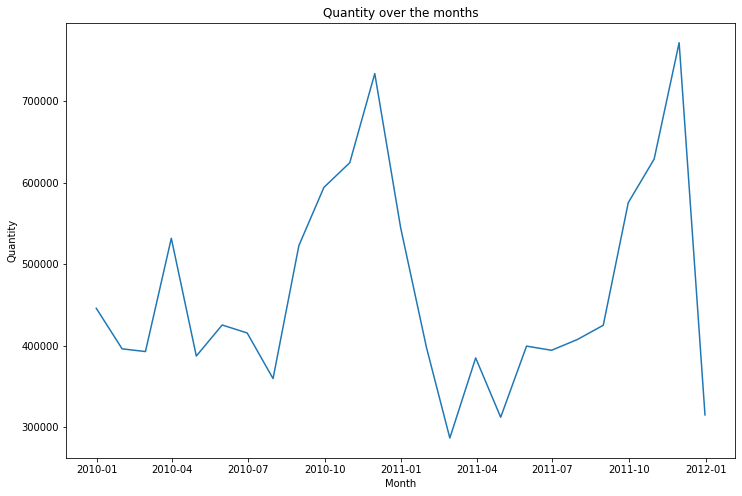

In [9]:
fig = plt.figure(figsize=(12, 8))
plt.plot(df_month['Quantity'])
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity over the months')
plt.show()

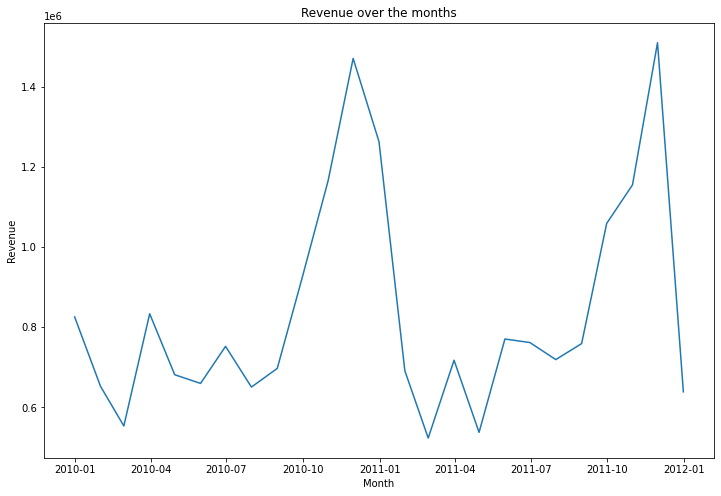

In [10]:
fig = plt.figure(figsize=(12, 8))
plt.plot(df_month['Revenue'])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue over the months')
plt.show()

In [11]:
descrp = df['Description'].unique()
descrp

array(['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS',
       ' WHITE CHERRY LIGHTS', ..., 'SET 10 CARDS SWIRLY XMAS TREE 17104',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [12]:
s = " ".join([str(x).lower() for x in descrp])


In [13]:
stop_words = STOPWORDS

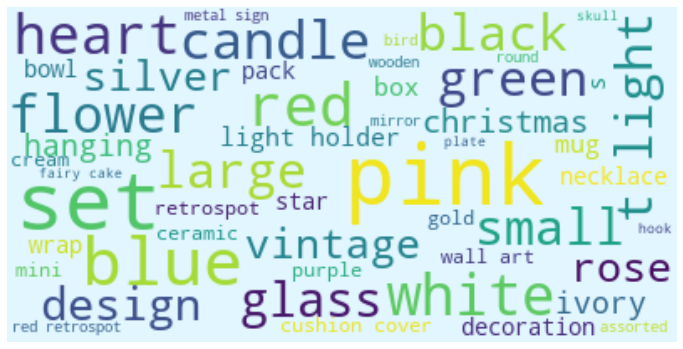

In [14]:
wordcloud = WordCloud(stopwords=stop_words, background_color='#E1F6FF', max_font_size=50, max_words= 50).generate(s)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()